<a href="https://colab.research.google.com/github/MarissaNorlund/Norlund-2025/blob/main/Python%20Image%20Reduction/Image_Data_Retrieval_Ex_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feb. 6, 2025**
---

*   Figured out how to use Prose to access the SDSS catalogue to grab images of different NGC/IC objects.
  *   First, install prose and some other libraries.
  *   Second, read in CSV files of NGC/IC data in order to get the RA and Dec.
  *   Third, RA and Dec is used to grab images from SDSS.

In [1]:
pip install 'prose @ git+https://github.com/lgrcia/prose'

  Cloning https://github.com/lgrcia/prose to /tmp/pip-install-agb8ri63/prose_e9edea2f679f4de1b7629abc34a4826a
  Running command git clone --filter=blob:none --quiet https://github.com/lgrcia/prose /tmp/pip-install-agb8ri63/prose_e9edea2f679f4de1b7629abc34a4826a
  Resolved https://github.com/lgrcia/prose to commit 020b6d4d57063a0757a4a944b930adf57c8cf148
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [18]:
from prose.archive import sdss_image
import pandas as pd
import requests

In [19]:
# Importing NGC/IC Catalogues from GitHub

url = 'https://github.com/mattiaverga/OpenNGC/raw/refs/heads/master/database_files/NGC.csv'

df = pd.read_csv(url, delimiter=';')

addendum_url = 'https://github.com/mattiaverga/OpenNGC/raw/refs/heads/master/database_files/addendum.csv'

df_addendum = pd.read_csv(addendum_url, delimiter=';')

# Print some info to verify the data has been read correctly
# print(df_addendum.head())  # Prints the first 5 rows
# print(df_addendum.shape)   # Prints the number of rows and columns

In [20]:
# Searches uploaded NGC/IC catalogues and gets the RA & Dec of the object
# Takes RA and Dec and gets the image from SDSS catalogue

def get_object_coordinates(object_name):
    """
    Retrieves the RA and Dec coordinates for a given NGC or IC object.

    Args:
        object_name (str): The name of the object (e.g., "NGC2238", "IC2169").

    Returns:
        tuple: A tuple containing the RA and Dec coordinates as strings, or None if
               the object is not found.
    """
    object_data = df[df["Name"] == object_name]  # Search in the main dataframe

    if object_data.empty:
        object_data = df_addendum[df_addendum["Name"] == object_name]  # Search in the addendum

    if not object_data.empty:
        ra = object_data["RA"].iloc[0]
        dec = object_data["Dec"].iloc[0]
        return str(ra), str(dec)
    else:
        return None

# Displays images in (20, 20) unless specified differently
def display_object_image(object_name, image_size=(20, 20)):
    """
    Displays an image of the specified NGC or IC object.

    Args:
        object_name (str): The name of the object (e.g., "NGC2238", "IC2169").
        image_size (tuple): The desired size of the image (width, height) in arcminutes.
                            Defaults to (20, 20).
    """
    coordinates = get_object_coordinates(object_name)

    if coordinates:
        ra, dec = coordinates
        image = sdss_image((ra, dec), image_size)
        image.show()
    else:
        print(f"Object {object_name} not found in the catalogs.")

INFO Querying https://archive.stsci.edu/cgi-bin/dss_form


/usr/local/lib/python3.11/dist-packages/erfa/core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


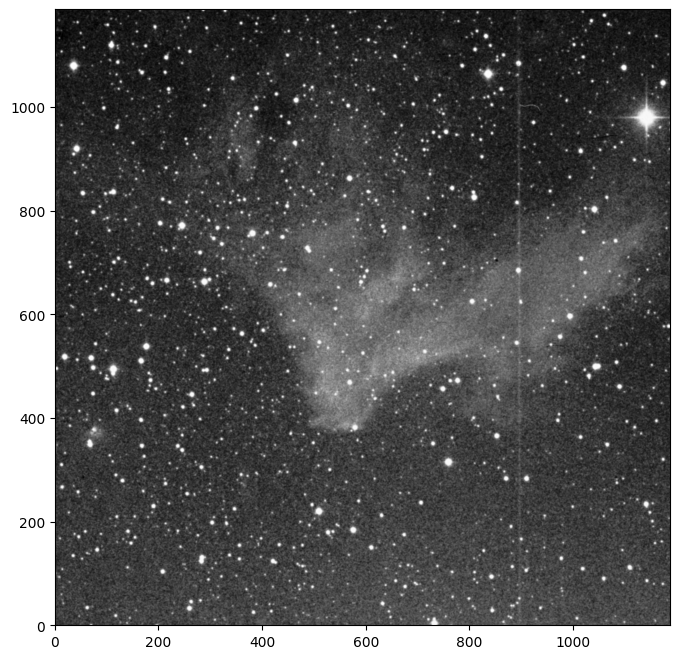

In [21]:
display_object_image("IC0059")

INFO Querying https://archive.stsci.edu/cgi-bin/dss_form


/usr/local/lib/python3.11/dist-packages/erfa/core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


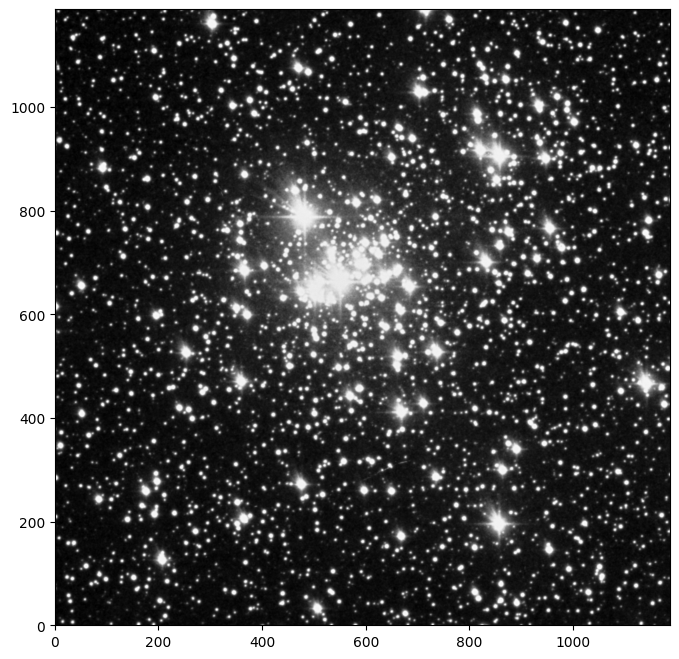

In [14]:
display_object_image("NGC0869")